<a href="https://colab.research.google.com/github/ravellys/PID-1/blob/master/Segmenta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import os
import imageio
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk
from skimage import filters as anything
import pandas as pd
from tqdm import tqdm

%matplotlib inline

In [59]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Plotagem Imagem + Histograma
def plot_im_hist(im, bits = 8):
  fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
  ax = axes.ravel()
  ax_cdf = ax[1].twinx()

  ax[0].imshow(im, cmap='gray', vmin =  0, vmax = 2**bits-1)
  ax[0].set_title('Image')
  ax[0].axis('off')

  ax[1].hist(im.ravel(), bins=(im.max()-im.min()), range = (0,  2**bits-1), density = True)
  ax[1].set_title('Histogram')

  img_cdf, bins = exposure.cumulative_distribution(im, nbins = 2**bits )
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  ax[1].grid(True)
  plt.show()

In [61]:
#plota imagem
def plot_im(im, im_bin, thresh = 1):   
  fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
  ax = axes.ravel()
  ax[0] = plt.subplot(1, 3, 1)
  ax[1] = plt.subplot(1, 3, 2)
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

  ax[0].imshow(im, cmap=plt.cm.gray)  
  ax[0].set_title('Original')
  ax[0].axis('off')

  ax[1].hist(im.ravel(), bins=2**8)
  ax[1].set_title('Histogram')
  #ax[1].axvline(thresh, color='r')

  ax[2].imshow(im_bin, cmap=plt.cm.gray)
  ax[2].set_title('Thresholded')
  ax[2].axis('off')

  plt.show()

In [62]:
from skimage import exposure

# Plotagem Imagem + Histograma
def plot_im_hist(im, bits = 8):
  fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
  ax = axes.ravel()
  ax_cdf = ax[1].twinx()

  ax[0].imshow(im, cmap='gray')
  ax[0].set_title('Image')
  ax[0].axis('off')

  ax[1].hist(im.ravel(), bins=(im.max()-im.min()), range = (0,  2**bits-1), density = True)
  ax[1].set_title('Histogram')

  img_cdf, bins = exposure.cumulative_distribution(im, nbins = 2**bits )
  ax_cdf.plot(bins, img_cdf, 'r')
  ax_cdf.set_yticks([])

  ax[1].grid(True)
  plt.show()

In [63]:
def import_file(path):
  list_files = os.listdir(path) # lista de arquivos dentro da pasta das amostras
  list_files = np.sort(np.array(list_files)) # organizar os arquivos
  im = [] # inicialização do vetor de armazenamento

  for file in tqdm(list_files) :
    fetch_file = os.path.join(path, file)  
    image = np.array(imageio.imread(fetch_file)) # importa imagem e converte em numpy
 
    im.append(image.T) # Adiciona matriz numpy ao vetor de armazenameto

  im = np.array(im)
  return im[:,:,:] 

In [64]:
#altera range dos tons de cinza
def im_alt_range(im, n_min=0, n_max=255):
  min = im.min()
  max = im.max()
  im_ = n_min +(im - min)*(n_max - n_min)/(max - min)
  return im_.astype(int)   

In [65]:
def im_recort(im,x,y,z):
  x_size,y_size,z_size = im.shape
  s_x,s_y,s_z = np.array([(x_size-x)/2,(y_size-y)/2,(z_size-z)/2]).astype(int)
  e_x,e_y,e_z = np.array([x_size-(x_size-x)/2,y_size-(y_size-y)/2,z_size-(z_size-z)/2]).astype(int)

  return im[s_x:e_x,s_y:e_y,s_z:e_z] # separa uma região de 400x400x400

In [142]:
path = 'drive/My Drive/Artigo Segmentação/Imagens/out_tambaba/denoise_mediana' #pasta da amostra
im = import_file(path)
print(im.shape)


100%|██████████| 650/650 [00:02<00:00, 302.72it/s]


(650, 300, 300)


In [143]:
p_5 = np.percentile(im, 1)
p_95 = np.percentile(im, 99)
im[im>p_95] = p_95
im[im<p_5] = p_5

In [144]:
im_rc = im_recort(im,650,300,300)

# OTSU

In [149]:
import skimage as sk
thresh = sk.filters.threshold_otsu(im_rc.ravel()) # Determina limiar de poros e solidos

im_seg = im_rc > thresh

In [150]:
im_seg.shape

(650, 300, 300)

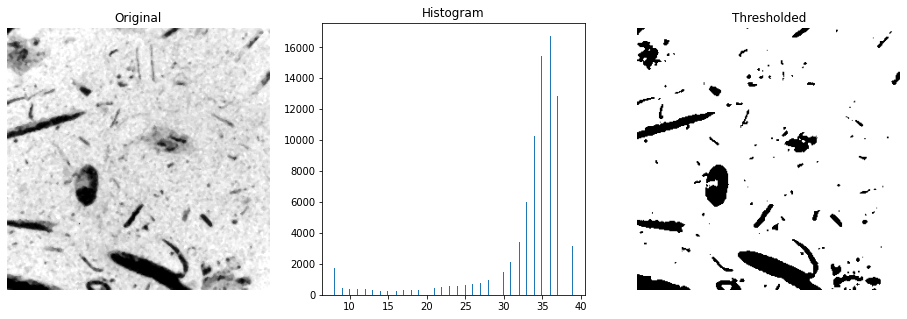

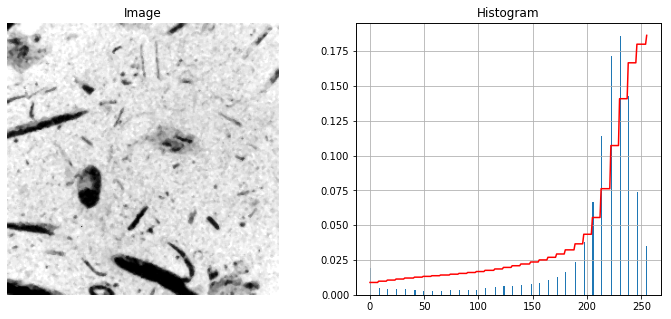

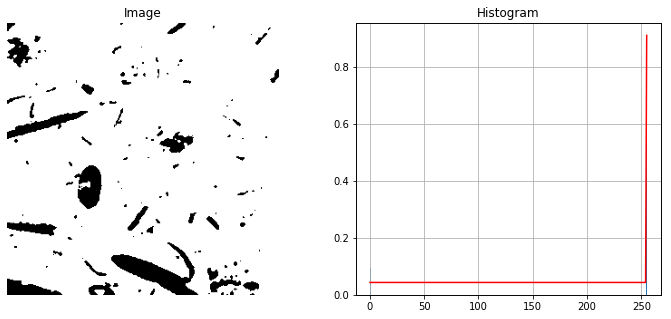

In [151]:
plot_im(im_rc[454],im_seg[454] )

face_255 = im_alt_range(im_rc[454]/255)
plot_im_hist(face_255, bits = 8)

im_seg = im_alt_range(im_seg/255)
plot_im_hist(im_seg[454], bits = 8)

In [152]:
from PIL import Image

path_out = 'drive/My Drive/Artigo Segmentação/Imagens/out_tambaba/seg_mediana/seg_otsu/'

for i, img in tqdm(enumerate(im_seg)):
  img = Image.fromarray(img.astype(np.uint8))
  img.save(path_out + f'im_{i}.tif')


0it [00:00, ?it/s]
1it [00:00,  4.29it/s]
13it [00:00,  6.04it/s]
29it [00:00,  8.48it/s]
41it [00:00, 11.74it/s]
53it [00:00, 16.08it/s]
68it [00:00, 21.83it/s]
86it [00:00, 29.29it/s]
104it [00:01, 38.55it/s]
123it [00:01, 49.85it/s]
141it [00:01, 62.09it/s]
159it [00:01, 75.01it/s]
178it [00:01, 88.98it/s]
195it [00:01, 102.98it/s]
211it [00:01, 112.87it/s]
226it [00:01, 115.22it/s]
241it [00:01, 120.01it/s]
256it [00:02, 125.52it/s]
271it [00:02, 130.33it/s]
287it [00:02, 137.91it/s]
302it [00:02, 133.32it/s]
316it [00:02, 124.78it/s]
330it [00:02, 121.70it/s]
345it [00:02, 128.25it/s]
359it [00:02, 125.73it/s]
376it [00:02, 134.93it/s]
391it [00:03, 138.89it/s]
406it [00:03, 134.88it/s]
421it [00:03, 137.43it/s]
435it [00:03, 136.03it/s]
450it [00:03, 137.93it/s]
466it [00:03, 138.55it/s]
483it [00:03, 146.42it/s]
498it [00:03, 142.75it/s]
513it [00:03, 132.81it/s]
527it [00:04, 127.28it/s]
540it [00:04, 124.75it/s]
554it [00:04, 122.87it/s]
570it [00:04, 131.43it/s]
584it [00:04

# K-MEAN 2D

In [163]:
from sklearn import cluster
from skimage import filters


def k_mean2D(face, n_clusters):
  X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array

  k_means = cluster.MiniBatchKMeans(n_clusters=n_clusters, n_init=4)
  k_means.fit(X)
  values = k_means.cluster_centers_.squeeze()
  labels = k_means.labels_

  face_compressed = np.choose(labels, values)
  face_compressed.shape = face.shape
  return face_compressed == face_compressed.max()

n_clusters = 2
im_seg = [k_mean2D(face, n_clusters) for face in tqdm(im_rc)]
im_seg = np.array(im_seg)

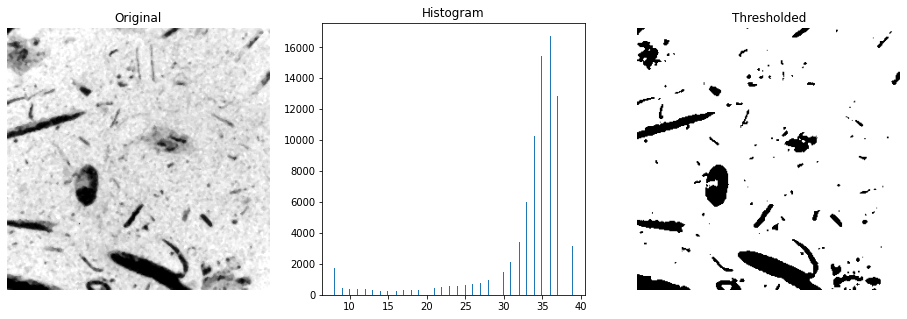

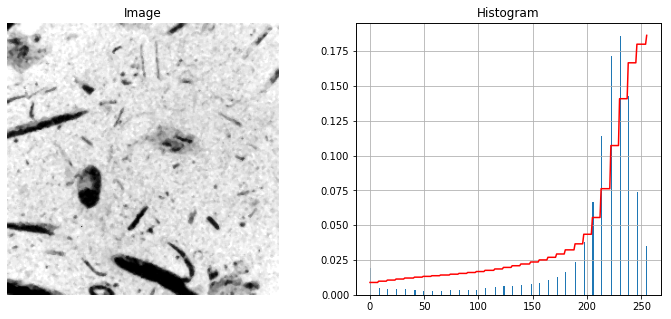

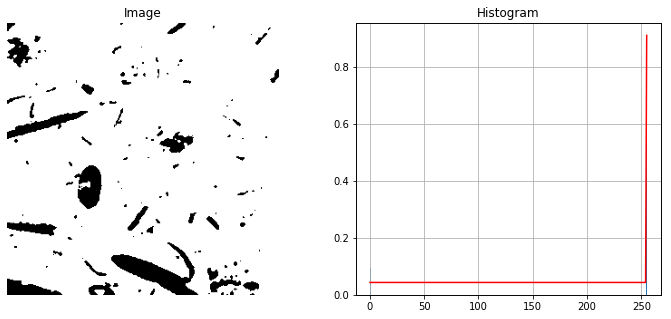

In [165]:
plot_im(im_rc[454],im_seg[454] )

face_255 = im_alt_range(im_rc[454]/255)
plot_im_hist(face_255, bits = 8)

im_seg = im_alt_range(im_seg.astype(int))
plot_im_hist(im_seg[454], bits = 8)

In [167]:
from PIL import Image

path_out = 'drive/My Drive/Artigo Segmentação/Imagens/out_tambaba/seg_mediana/seg_kmean2D/'

for i, img in tqdm(enumerate(im_seg)):
  img = Image.fromarray(img.astype(np.uint8))
  img.save(path_out + f'im_{i}.tif')


0it [00:00, ?it/s]
11it [00:00, 92.49it/s]
23it [00:00, 98.62it/s]
34it [00:00, 97.19it/s]
46it [00:00, 99.30it/s]
59it [00:00, 106.24it/s]
69it [00:00, 103.20it/s]
81it [00:00, 101.54it/s]
96it [00:00, 112.18it/s]
108it [00:00, 111.50it/s]
120it [00:01, 109.71it/s]
133it [00:01, 113.89it/s]
145it [00:01, 109.69it/s]
157it [00:01, 108.84it/s]
169it [00:01, 107.02it/s]
183it [00:01, 114.84it/s]
195it [00:01, 112.90it/s]
207it [00:01, 105.43it/s]
221it [00:02, 112.99it/s]
233it [00:02, 108.43it/s]
245it [00:02, 106.89it/s]
258it [00:02, 104.94it/s]
273it [00:02, 113.83it/s]
285it [00:02, 112.23it/s]
297it [00:02, 109.89it/s]
311it [00:02, 110.04it/s]
326it [00:02, 117.67it/s]
338it [00:03, 114.68it/s]
350it [00:03, 112.61it/s]
364it [00:03, 110.96it/s]
378it [00:03, 116.31it/s]
390it [00:03, 113.32it/s]
402it [00:03, 110.86it/s]
417it [00:03, 118.63it/s]
430it [00:03, 112.56it/s]
442it [00:03, 109.69it/s]
454it [00:04, 103.89it/s]
468it [00:04, 109.66it/s]
480it [00:04, 106.34it/s]
491i

# K-MEAN 3D

In [168]:
from sklearn import cluster
from skimage import filters

n_clusters = 2

face = im_rc

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array

k_means = cluster.MiniBatchKMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

In [181]:
face_compressed.astype()

In [182]:
im_seg.sum()/im_seg.ravel().shape[0]/255

0.1301259207078752

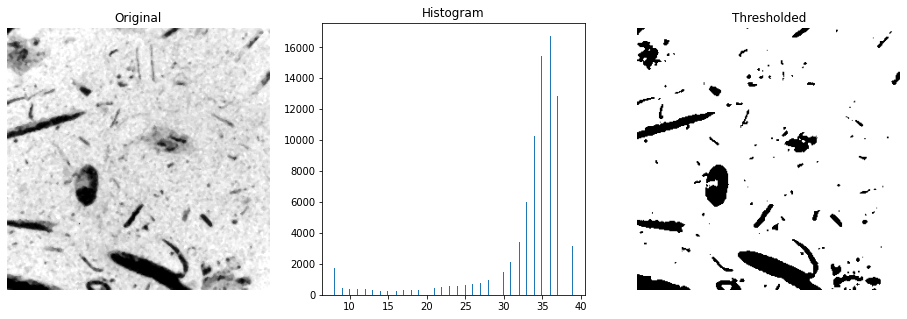

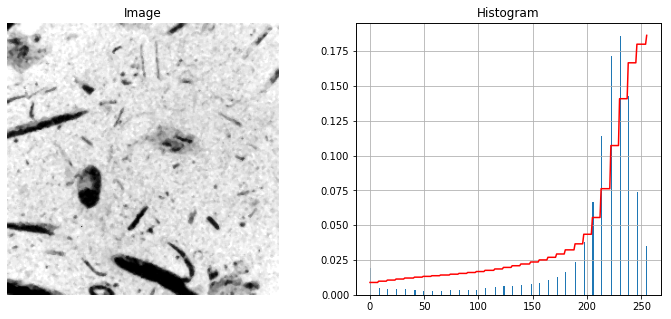

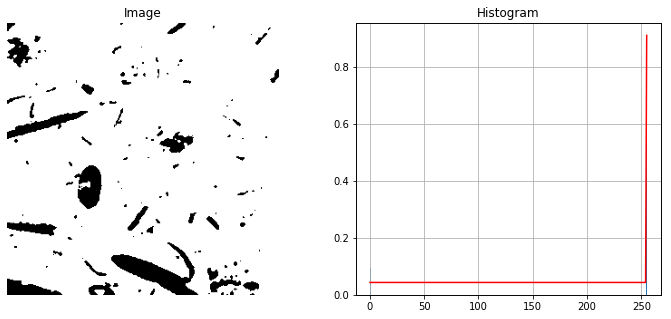

In [177]:
plot_im(face[454],face_compressed[454] )

face_255 = im_alt_range(face[454]/255)
plot_im_hist(face_255, bits = 8)

im_seg = im_alt_range(face_compressed.astype(int))
plot_im_hist(im_seg[454], bits = 8)


In [139]:
from PIL import Image

path_out = 'drive/My Drive/Artigo Segmentação/Imagens/out_tambaba/seg_mediana/seg_kmean3D/'

for i, img in tqdm(enumerate(im_seg)):
  img = Image.fromarray(img.astype(np.uint8))
  img.save(path_out + f'im_{i}.tif')


0it [00:00, ?it/s]
15it [00:00, 123.87it/s]
33it [00:00, 129.38it/s]
51it [00:00, 140.86it/s]
68it [00:00, 147.34it/s]
81it [00:00, 141.56it/s]
96it [00:00, 142.92it/s]
110it [00:00, 141.98it/s]
125it [00:00, 138.37it/s]
143it [00:00, 141.67it/s]
161it [00:01, 144.07it/s]
179it [00:01, 152.77it/s]
195it [00:01, 152.47it/s]
211it [00:01, 151.07it/s]
227it [00:01, 149.02it/s]
243it [00:01, 151.10it/s]
259it [00:01, 148.83it/s]
274it [00:01, 144.18it/s]
289it [00:01, 142.02it/s]
306it [00:02, 147.58it/s]
321it [00:02, 144.52it/s]
336it [00:02, 139.52it/s]
351it [00:02, 140.20it/s]
366it [00:02, 142.60it/s]
382it [00:02, 146.45it/s]
398it [00:02, 148.71it/s]
415it [00:02, 149.67it/s]
434it [00:02, 152.18it/s]
452it [00:03, 149.99it/s]
470it [00:03, 149.16it/s]
488it [00:03, 153.46it/s]
506it [00:03, 150.01it/s]
524it [00:03, 149.68it/s]
541it [00:03, 151.25it/s]
559it [00:03, 154.21it/s]
577it [00:03, 152.95it/s]
595it [00:04, 152.08it/s]
611it [00:04, 152.18it/s]
627it [00:04, 148.11it/s